# Objective:--> This is a usecase where we aim to find bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Kore

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
temp_df=pd.read_csv('Bias_correction.csv')

# Finding insights of the data and what it consist of

In [3]:
temp_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
temp_df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


# Attribute Information

1. station - used weather station number: 1 to 25
    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    
19. lat - Latitude (Â°): 37.456 to 37.645
    
20. lon - Longitude (Â°): 126.826 to 127.135
    
21. DEM - Elevation (m): 12.4 to 212.3
    
22. Slope - Slope (Â°): 0.1 to 5.2
    
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [5]:
#finding number of rows and columns present in the dataset
temp_df.shape

(7752, 25)

In [6]:
#finding the information about the dataset
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


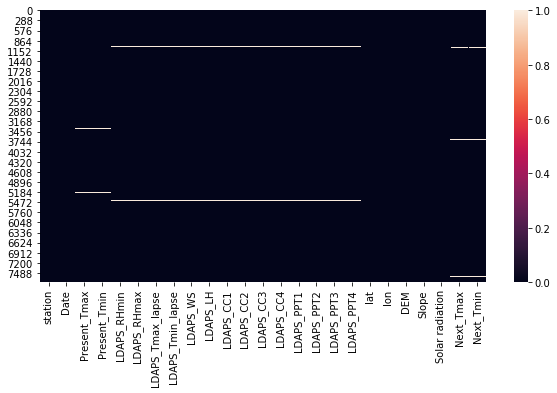

In [7]:
#Cheking the nul values
plt.figure(figsize=(10,5))
sns.heatmap(temp_df.isnull())

In [8]:
temp_df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
temp_df.isna()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7750,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
temp_df.dropna(axis=0,inplace=True)

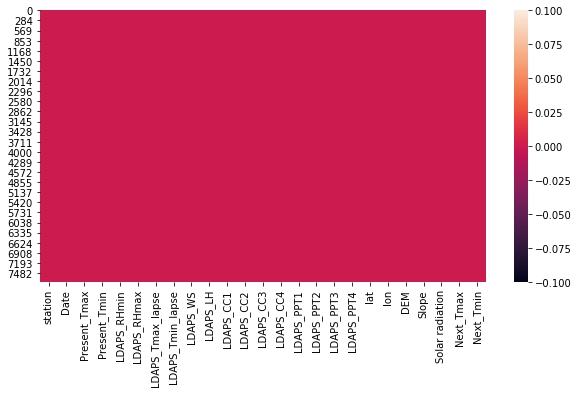

In [11]:
#Cheking the nul values
plt.figure(figsize=(10,5))
sns.heatmap(temp_df.isnull())

In [12]:
temp_df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [13]:
#finding number of rows and columns present in the dataset after removing null values
temp_df.shape

(7588, 25)

# Bivariate Analysis

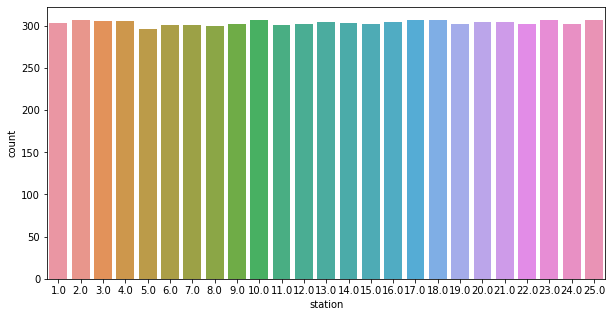

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(temp_df['station'])

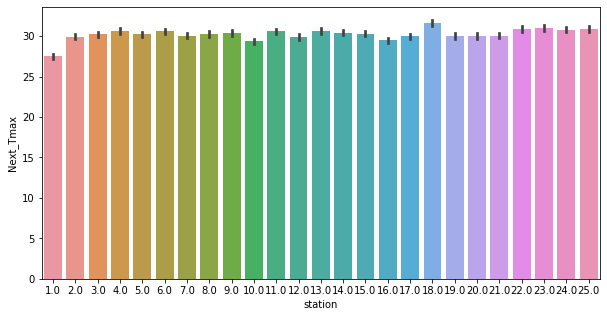

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(temp_df['station'],temp_df['Next_Tmax'])

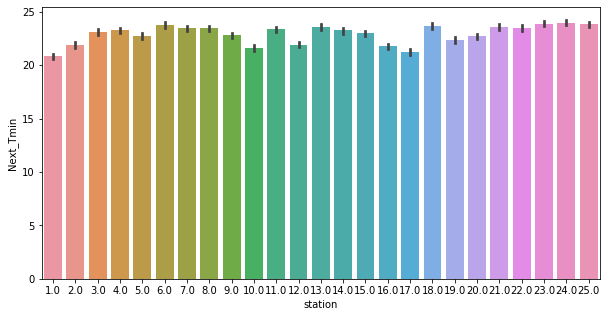

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(temp_df['station'],temp_df['Next_Tmin'])

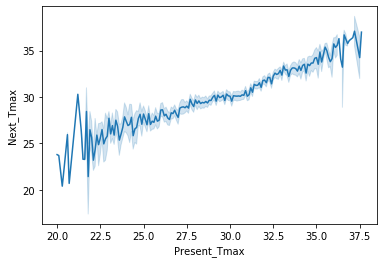

In [17]:
sns.lineplot(temp_df['Present_Tmax'],temp_df['Next_Tmax'])

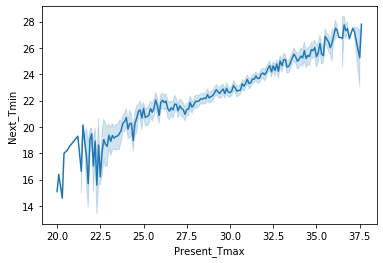

In [18]:
sns.lineplot(temp_df['Present_Tmax'],temp_df['Next_Tmin'])

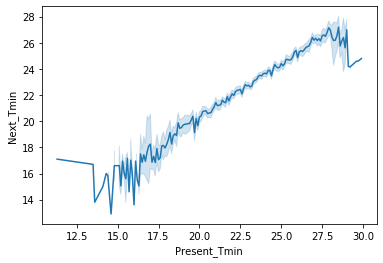

In [19]:
sns.lineplot(temp_df['Present_Tmin'],temp_df['Next_Tmin'])

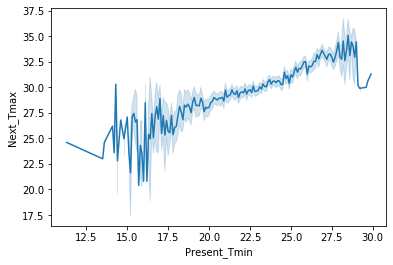

In [20]:
sns.lineplot(temp_df['Present_Tmin'],temp_df['Next_Tmax'])

In [21]:
#From the above four line plot we can say that Presnt day temprature is very usefull in predicting the next day tempertaure

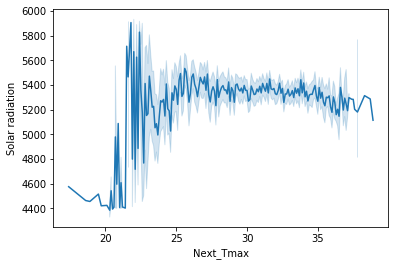

In [22]:
sns.lineplot(temp_df['Next_Tmax'],temp_df['Solar radiation'])

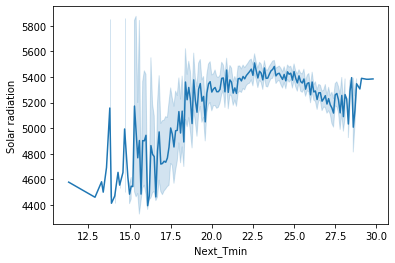

In [23]:
sns.lineplot(temp_df['Next_Tmin'],temp_df['Solar radiation'])

In [24]:
#From the above two line plot we can say that solar radiation plays an important role on temprature of the day

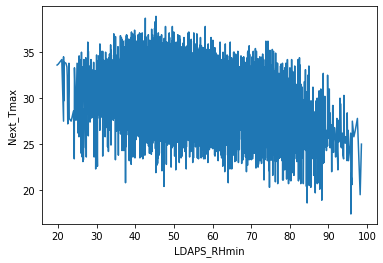

In [25]:
sns.lineplot(temp_df['LDAPS_RHmin'],temp_df['Next_Tmax'])

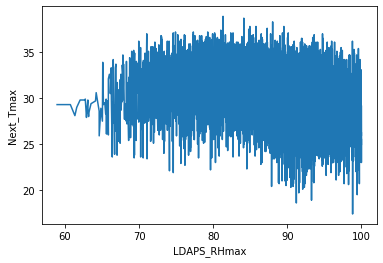

In [26]:
sns.lineplot(temp_df['LDAPS_RHmax'],temp_df['Next_Tmax'])

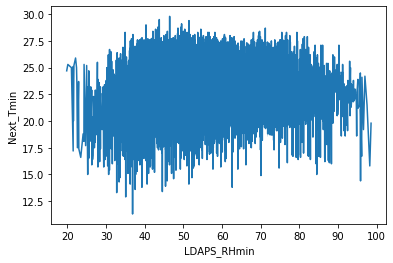

In [27]:
sns.lineplot(temp_df['LDAPS_RHmin'],temp_df['Next_Tmin'])

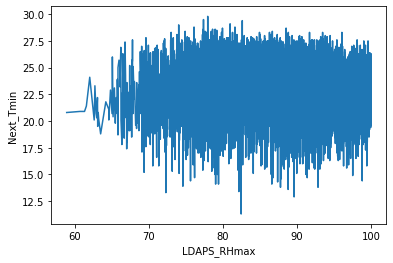

In [28]:
sns.lineplot(temp_df['LDAPS_RHmax'],temp_df['Next_Tmin'])

In [29]:
# from the above four lineplot we canm say that humidity donot effect much to temperature

In [30]:
#dropping date column
temp_df.drop(['Date'],axis=1,inplace=True)

# Univariate analysis

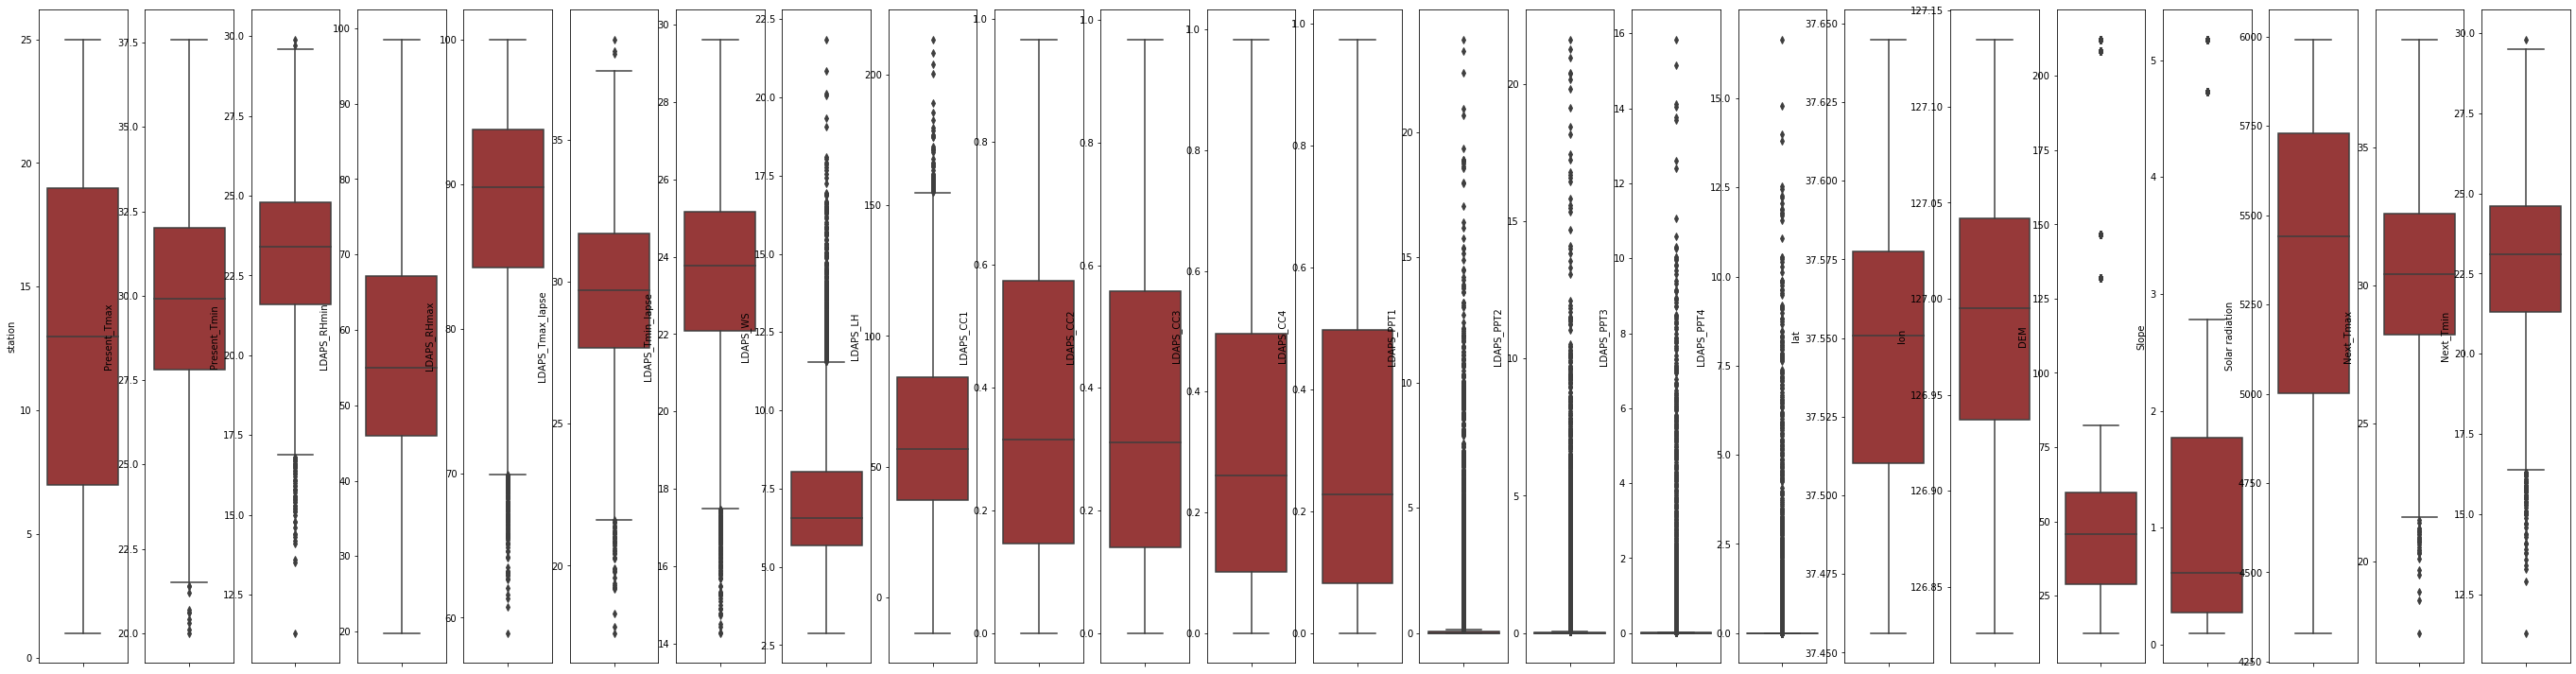

In [31]:
#using boxplot to see outliers and IQR range
collist=temp_df.columns.values
ncol=25
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(temp_df[collist[i]],color='brown',orient='v')

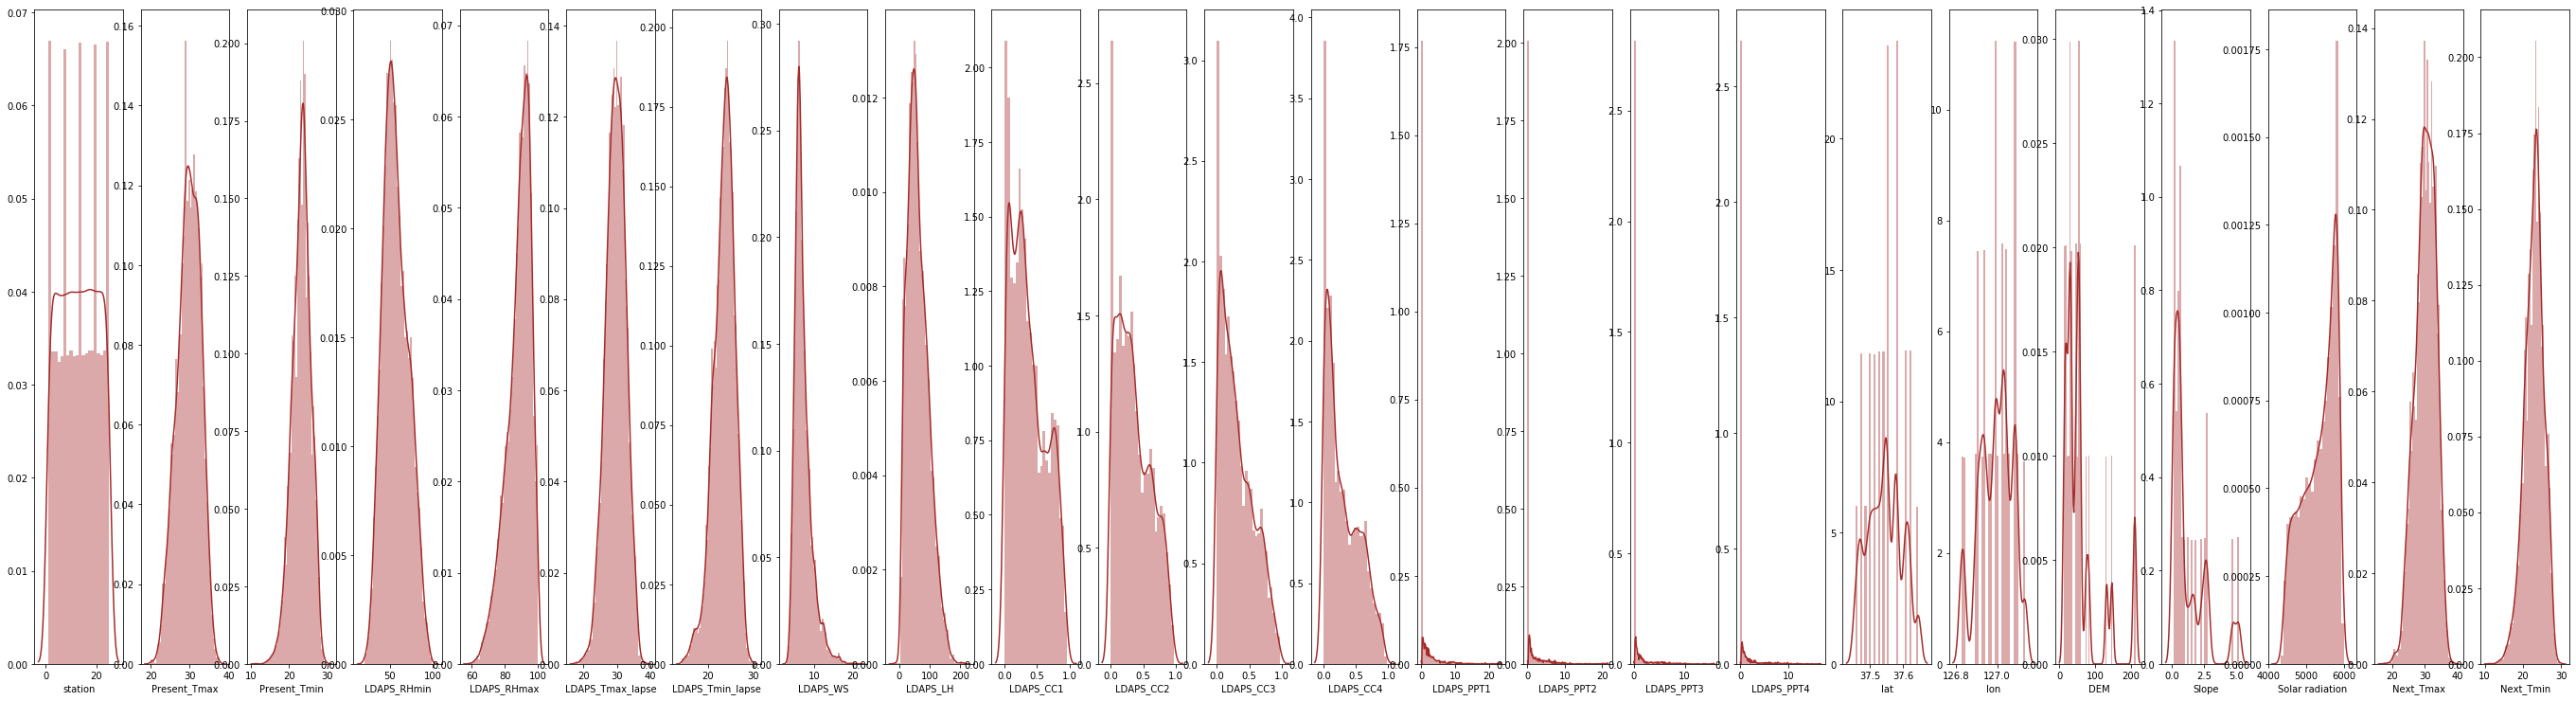

In [32]:
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(temp_df[collist[i]],color='brown')

# Statistical Analysis

In [33]:
temp_df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


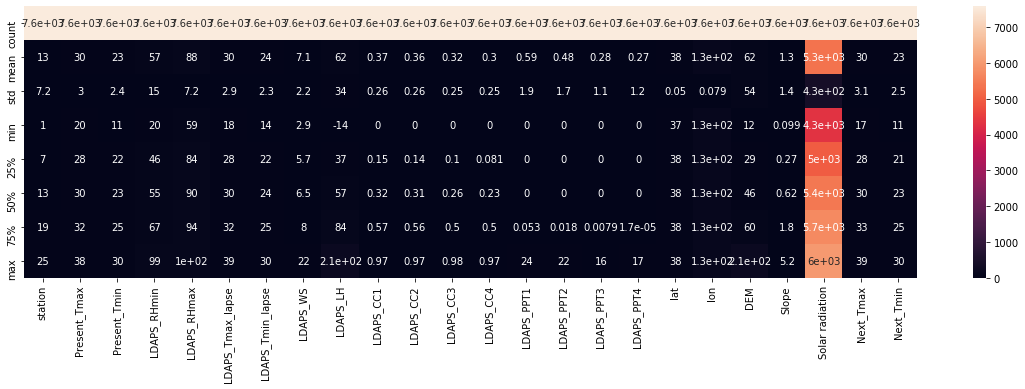

In [34]:
plt.figure(figsize=(20,5))
sns.heatmap(temp_df.describe(),annot=True)

In [35]:
temp_df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


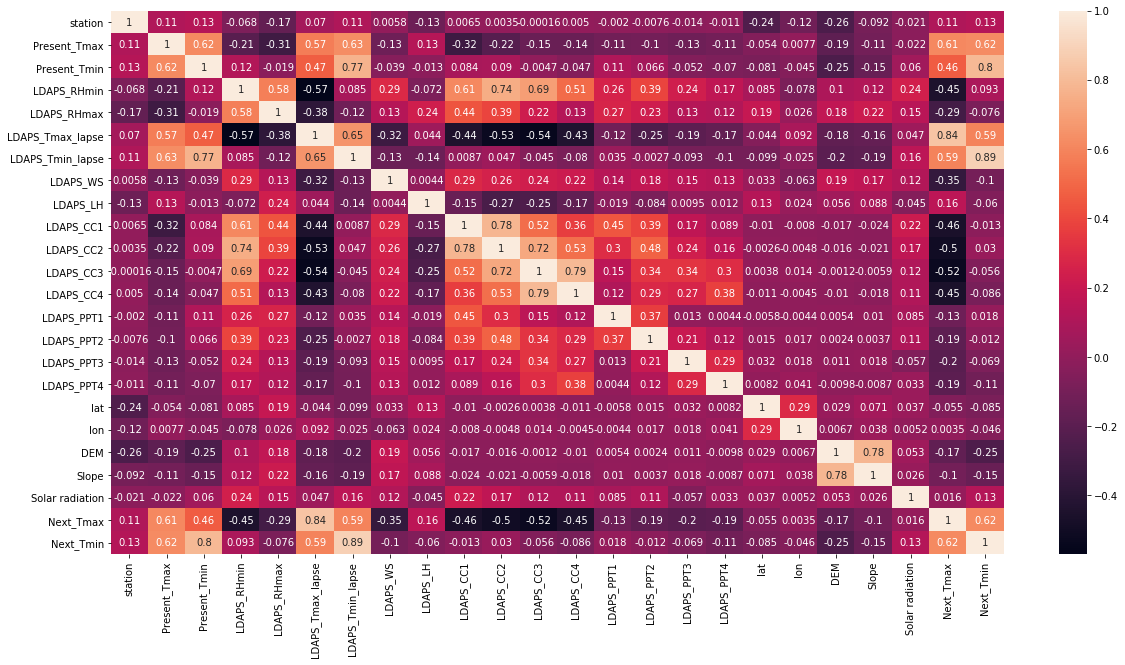

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(temp_df.corr(),annot=True)

In [37]:
#Cheking for skewness
temp_df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [38]:
temp_df.cov()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,52.097468,2.426707,2.309668,-7.162681,-8.800240,1.484145,1.780060,0.091479,-32.126103,0.012378,...,-0.096068,-0.114694,-0.094386,-0.087035,-0.067955,-100.654250,-0.908802,-65.746322,2.420068,2.296618
Present_Tmax,2.426707,8.805466,4.382972,-9.073743,-6.557434,5.011672,4.370358,-0.813669,13.419322,-0.246180,...,-0.542038,-0.432757,-0.375587,-0.008101,0.001809,-30.537431,-0.436187,-28.203221,5.636019,4.574547
Present_Tmin,2.309668,4.382972,5.764224,4.291245,-0.321094,3.306670,4.342265,-0.202691,-1.036582,0.053110,...,0.277112,-0.144262,-0.199363,-0.009857,-0.008592,-33.138665,-0.489173,61.668909,3.463014,4.749649
LDAPS_RHmin,-7.162681,-9.073743,4.291245,213.936226,60.902975,-24.522243,2.920544,9.215937,-35.571450,2.350795,...,9.933645,3.981487,2.886844,0.062715,-0.089904,80.000445,2.458704,1522.328485,-20.337212,3.385596
LDAPS_RHmax,-8.800240,-6.557434,-0.321094,60.902975,51.832171,-7.995423,-2.006373,2.057433,57.959348,0.823104,...,2.856369,1.092759,1.003024,0.070730,0.014579,69.051539,2.168698,453.678103,-6.492211,-1.365613
LDAPS_Tmax_lapse,1.484145,5.011672,3.306670,-24.522243,-7.995423,8.664169,4.505608,-2.025026,4.329381,-0.340340,...,-1.274498,-0.653613,-0.591738,-0.006539,0.021352,-29.011316,-0.662232,59.981626,7.654937,4.310571
LDAPS_Tmin_lapse,1.780060,4.370358,4.342265,2.920544,-2.006373,4.505608,5.487676,-0.686707,-11.022080,0.005353,...,-0.011203,-0.249999,-0.286130,-0.011748,-0.004584,-25.247289,-0.604129,158.835954,4.316342,5.154965
LDAPS_WS,0.091479,-0.813669,-0.202691,9.215937,2.057433,-2.025026,-0.686707,4.739476,0.324623,0.162919,...,0.689351,0.367273,0.345233,0.003626,-0.010867,22.297514,0.505726,112.867344,-2.378577,-0.551318
LDAPS_LH,-32.126103,13.419322,-1.036582,-35.571450,57.959348,4.329381,-11.022080,0.324623,1134.757228,-1.310286,...,-4.955024,0.366582,0.491636,0.226457,0.065316,103.138882,4.047009,-650.853357,16.434336,-5.049879
LDAPS_CC1,0.012378,-0.246180,0.053110,2.350795,0.823104,-0.340340,0.005353,0.162919,-1.310286,0.068780,...,0.178021,0.050124,0.027503,-0.000136,-0.000165,-0.247579,-0.008602,24.603953,-0.375166,-0.008383


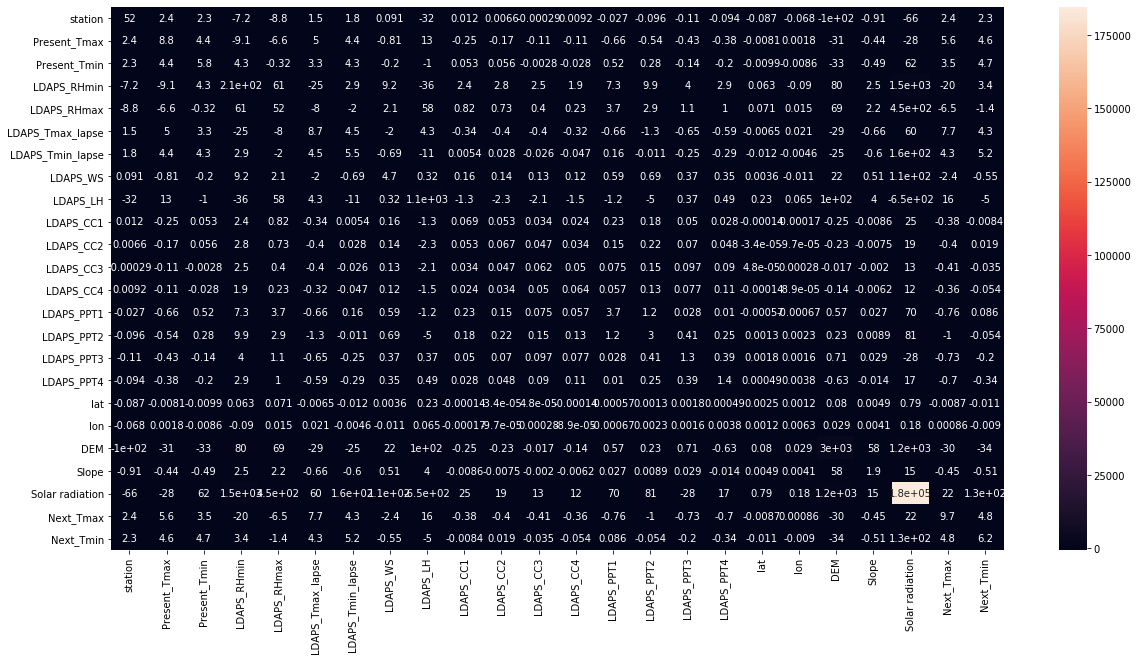

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(temp_df.cov(),annot=True)

# Removing The outliers and Skewness

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(temp_df))
print(z)

[[1.66460654 0.35331763 0.74802891 ... 1.51056517 0.36686121 0.68926525]
 [1.52605214 0.72513836 0.66472063 ... 1.22299734 0.08306779 0.1655135 ]
 [1.38749775 0.62403311 0.0433998  ... 1.20960169 0.27589451 0.39852685]
 ...
 [1.38359018 2.17321212 2.53915704 ... 2.09517477 0.6239635  1.93821173]
 [1.52214457 2.17321212 2.28923218 ... 2.10667071 0.52755014 1.65619156]
 [1.66069897 2.20691387 2.41419461 ... 2.07648676 0.78465243 2.2202319 ]]


In [41]:
threhold=3

In [42]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [43]:
z[25][7]#checking the above output result

3.911059950709196

In [44]:
temp_new=temp_df[(z<3).all(axis=1)]  #removing outliers

In [45]:
print("Shape of the dataset before removing outliers",temp_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",temp_new.shape)

Shape of the dataset before removing outliers (7588, 24)

 

Shape of the dataset after removing the outliers (6739, 24)


In [46]:
#afte rremoving outliers we are left with 6739 rows

In [47]:
temp_new.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [48]:
#cheking skewness after removing outliers
temp_new.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [49]:
#removing the Skewness
collist=temp_new.columns.values
for i in range(0,len(collist)):
    if temp_new.skew().loc[collist[i]]>0.55:
        temp_new[collist[i]]=np.sqrt(temp_new[collist[i]])

In [50]:
temp_new.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.735377
LDAPS_LH            0.000881
LDAPS_CC1          -0.165760
LDAPS_CC2           0.505774
LDAPS_CC3          -0.092441
LDAPS_CC4           0.010396
LDAPS_PPT1          2.451176
LDAPS_PPT2          3.115912
LDAPS_PPT3          3.365579
LDAPS_PPT4          3.709695
lat                 0.106983
lon                -0.277547
DEM                 1.173816
Slope               0.880825
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [51]:
temp_new.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [52]:
temp_new.dropna(axis=0,inplace=True)

# Splitting the data into training and testing sets for maximum temprature

In [54]:
x=temp_new.iloc[:,:-2]

In [55]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.611300,8.333775,0.483681,...,0.361840,0.0,0.0,0.0,0.0,37.6046,126.991,14.571719,1.668832,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,2.385768,7.206764,0.474877,...,0.357390,0.0,0.0,0.0,0.0,37.6046,127.032,6.690471,0.717008,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,2.477544,4.535752,0.457541,...,0.376995,0.0,0.0,0.0,0.0,37.5776,127.058,5.771204,0.515849,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,2.376983,8.107228,0.465158,...,0.366400,0.0,0.0,0.0,0.0,37.6450,127.022,6.761361,1.592106,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,2.394787,10.390647,0.389110,...,0.412336,0.0,0.0,0.0,0.0,37.5507,127.135,5.919290,0.710985,5859.552246


In [56]:
x.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
dtype: object

In [57]:
y=temp_new.iloc[:,-2]

In [58]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [59]:
y.tail()

7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, dtype: float64

In [60]:
x.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.569680,3.100657,0.230005,...,0.066181,0.0,0.0,0.0,0.0,37.5507,127.040,5.128158,0.756373,4456.024414
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,2.401683,9.063482,0.257801,...,0.132958,0.0,0.0,0.0,0.0,37.5102,127.086,4.686875,0.364966,4441.803711
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,2.479701,8.488716,0.173304,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,3.948113,0.394208,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.557893,6.873242,0.189404,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,4.158798,0.471487,4438.373535
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,2.699864,3.014968,0.221254,...,0.028216,0.0,0.0,0.0,0.0,37.5237,126.970,4.425427,0.520865,4451.345215


In [61]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
x=df_x
print(x)

[[-1.6725667  -0.42570048 -0.81449997 ...  2.4993914   1.28276905
   1.54337945]
 [-1.53380738  0.69013894 -0.72783024 ... -0.18757898 -0.46725978
   1.24979296]
 [-1.39504806  0.58552899  0.00886249 ... -0.5009864  -0.83711146
   1.23611695]
 ...
 [ 1.38013833 -2.30867951 -2.67789921 ... -1.12253657 -1.06076074
  -2.13782684]
 [ 1.51889765 -2.30867951 -2.41789002 ... -1.05070749 -0.9186753
  -2.14956339]
 [ 1.65765697 -2.34354949 -2.54789461 ... -0.95980524 -0.82788929
  -2.11874771]]


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

In [63]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.7422535849681088 at random state 42
R2 SCORE is equal to : 0.7844906772520454 at random state 43
R2 SCORE is equal to : 0.771579092794062 at random state 44
R2 SCORE is equal to : 0.7478460249247678 at random state 45
R2 SCORE is equal to : 0.763366909230339 at random state 46
R2 SCORE is equal to : 0.765494591866472 at random state 47
R2 SCORE is equal to : 0.7516933216281401 at random state 48
R2 SCORE is equal to : 0.7692219545019914 at random state 49
R2 SCORE is equal to : 0.7312784156675121 at random state 50
R2 SCORE is equal to : 0.7544428319216754 at random state 51
R2 SCORE is equal to : 0.764540103101628 at random state 52
R2 SCORE is equal to : 0.7500939903062794 at random state 53
R2 SCORE is equal to : 0.7600400774185535 at random state 54
R2 SCORE is equal to : 0.766872975543776 at random state 55
R2 SCORE is equal to : 0.7402277944731472 at random state 56
R2 SCORE is equal to : 0.7562374897804406 at random state 57
R2 SCORE is equal to : 0.7637

In [64]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5053, 22) (1685, 22) (5053,) (1685,)


In [65]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [66]:
from sklearn.linear_model import Lasso,Ridge

In [67]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.750728622077983


The R2 score is 0.7844921186348845


In [68]:
ri=Ridge(alpha=0.001)
ri.fit(x_train,y_train)
print(ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.750728671562099


The r2_score is 0.7844906756984349


In [69]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.5982214627072004
The r2_score is 0.6324921167631943


array([ 0.        ,  0.34005578,  0.02517674, -0.        , -0.        ,
        0.89096627,  0.2203266 , -0.        ,  0.        , -0.03345484,
       -0.19244436, -0.12043424, -0.09738958, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ])

In [70]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'mse'}

In [73]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 5}

In [72]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'rbf'}

In [74]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='rbf'),DecisionTreeRegressor(criterion='mse'),KNeighborsRegressor(n_neighbors=5)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = 0.7844906772520454




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = 0.8571670415926954




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = 0.7156754128217941




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2_SCORE = 0.8293179975827445




In [75]:
#SVR is giving Good result hence finalizing it

In [76]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
print("\n")
preed=svr.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.8766794963719776


The R2 score is 0.8571670415926954


In [77]:
#Applying boosting techniques to make the result better

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbrpred=gbr.predict(x_test)
R2_score=r2_score(gbrpred,y_test)
print("R2 Score =", R2_score)

0.9754440397324566
R2 Score = 0.8952959120355914


In [114]:
#saving the model with GradientBoostingRegressor
from sklearn.externals import joblib
joblib.dump(gbr,"gbr__maximum_temperature.pkl")

['gbr__maximum_temperature.pkl']

# Splitting the data into training and testing sets for minimum temprature

In [81]:
z=temp_new.iloc[:,-1]

In [82]:
z.shape

(6738,)

In [83]:
z.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [84]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,z_train)
    lm.score(x_train,z_train)
    pred=lm.predict(x_test)
    r_score=r2_score(z_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.8190085819143893 at random state 42
R2 SCORE is equal to : 0.8371365566019083 at random state 43
R2 SCORE is equal to : 0.8142527898628924 at random state 44
R2 SCORE is equal to : 0.8179411130476386 at random state 45
R2 SCORE is equal to : 0.8143641722113674 at random state 46
R2 SCORE is equal to : 0.8168779349196678 at random state 47
R2 SCORE is equal to : 0.8261478833985342 at random state 48
R2 SCORE is equal to : 0.8331555528033829 at random state 49
R2 SCORE is equal to : 0.8172017324578159 at random state 50
R2 SCORE is equal to : 0.8159039262890986 at random state 51
R2 SCORE is equal to : 0.8197945716336349 at random state 52
R2 SCORE is equal to : 0.8185664950647312 at random state 53
R2 SCORE is equal to : 0.8251388489418319 at random state 54
R2 SCORE is equal to : 0.8221910551636908 at random state 55
R2 SCORE is equal to : 0.8237568260144443 at random state 56
R2 SCORE is equal to : 0.8238338006638517 at random state 57
R2 SCORE is equal to : 0

In [99]:
#finalizing the train_test_split
x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.25,random_state=43)
print(x_train.shape,x_test.shape,z_train.shape,z_test.shape)

(5053, 22) (1685, 22) (5053,) (1685,)


In [100]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [101]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,z_train)
print(ls.score(x_train,z_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(z_test,preed)
print("The R2 score is",r_score)

0.8169930000726147


The R2 score is 0.8371457442217947


In [102]:
ri=Ridge(alpha=0.001)
ri.fit(x_train,z_train)
print(ri.score(x_train,z_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(z_test,predd)
print("The r2_score is",r_score)

0.8169930775146178


The r2_score is 0.8371365573181022


In [103]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,z_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,z_train))
r_score=r2_score(z_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.6568089106583922
The r2_score is 0.6729378398994885


array([ 0.        ,  0.12918313,  0.4534734 ,  0.        , -0.        ,
        0.03195388,  0.73998374,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ])

In [104]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x_train,z_train)
gd.best_params_

{'criterion': 'friedman_mse'}

In [105]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x_train,z_train)
gd.best_params_

{'n_neighbors': 5}

In [106]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x_train,z_train)
gd.best_params_

{'kernel': 'rbf'}

In [107]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='rbf'),DecisionTreeRegressor(criterion='friedman_mse'),KNeighborsRegressor(n_neighbors=5)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,z_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(z_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")
    
    

    



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = 0.8371365566019083




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = 0.9037079632427059




DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = 0.7793783582801984




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2_SCORE = 0.8648366436932973




In [108]:
#SVR is giving Good result hence finalizing it

In [109]:
svr=SVR(kernel='rbf')
svr.fit(x_train,z_train)
print(svr.score(x_train,z_train))
print("\n")
preed=svr.predict(x_test)
r_score=r2_score(z_test,preed)
print("The R2 score is",r_score)

0.919863297733868


The R2 score is 0.9037079632427059


In [111]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x_train,z_train)
print(gbr.score(x_train,z_train))
gbrpred=gbr.predict(x_test)
R2_score=r2_score(gbrpred,z_test)
print("R2 Score =", R2_score)

0.9820823966929385
R2 Score = 0.9252241792894466


In [113]:
#saving the model with svr 
from sklearn.externals import joblib
joblib.dump(svr,"svr_minimum_temperature.pkl")

['svr_minimum_temperature.pkl']